<a href="https://colab.research.google.com/github/khaledhassann/QR-Code-Reader/blob/main/computer_vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [677]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
# from google.colab.patches import cv2_imshow


# Trail



In [ ]:
gs_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2_imshow(gs_img)


NameError: name 'img' is not defined

In [ ]:
# Apply Gaussian blur to reduce noise
#blurred = cv2.GaussianBlur(gs_img, (5, 5), 0)
#cv2_imshow(blurred)

In [ ]:
# Thresholding
_, thresh = cv2.threshold(gs_img, 90, 255, cv2.THRESH_BINARY)
cv2_imshow(thresh)

In [ ]:
# Apply Canny edge detection
edges = cv2.Canny(thresh, 50, 150)
cv2_imshow(edges)

In [ ]:
# Apply hough transfrom and fill the inside of the othline black
# Apply Hough Line Transform to detect lines
lines = cv2.HoughLinesP(edges, 1, np.pi / 180, threshold=35, minLineLength=50, maxLineGap=100)

# Create a black mask image
mask = np.zeros_like(gs_img)

# Draw detected lines on the mask
if lines is not None:
    for line in lines:
        x1, y1, x2, y2 = line[0]
        cv2.line(mask, (x1, y1), (x2, y2), (255, 255, 255), 2)
cv2_imshow(mask)
# Find contours in the mask image
# contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# # Fill the area enclosed by the lines with black color
# filled_image = np.zeros_like(img)

# cv2.fillPoly(mask, mask[0], (255, 255, 255))

# cv2_imshow(filled_image)

In [ ]:
# # Apply Gaussian blur to reduce noise
# blurred_2 = cv2.GaussianBlur(mask, (19, 19), 0)
# cv2_imshow(blurred_2)

In [ ]:
# # Apply Canny edge detection
# edges_2 = cv2.Canny(blurred_2, 50, 150)
# cv2_imshow(edges_2)

In [ ]:
contours, _ = cv2.findContours(mask.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
# Filter contours to find hexagons (6 sides) with maximum perimeter
max_perimeter = 0
selected_contour = None
for contour in contours:
    approx = cv2.approxPolyDP(contour, 0.02 * cv2.arcLength(contour, True), True)
    if len(approx) :  # Filter hexagons
        #print(len(approx))
        perimeter = cv2.arcLength(contour, True)
        if perimeter > max_perimeter:
            max_perimeter = perimeter
            selected_contour = contour

# Draw the selected contour on the original image
if selected_contour is not None:
    cv2.drawContours(img, [selected_contour], -1, (255, 0, 0), 2)
#cv2.drawContours(img, contours, -1, (0, 255, 0), 2)
#print(len(contours))
# Display the original image with detected edges
cv2_imshow(img)

In [ ]:
import cv2

# Load the image
image = cv2.imread('/content/14-BANANAAA!!!.png')

# Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply Gaussian blur
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

# Thresholding
_, thresh = cv2.threshold(blurred, 127, 255, cv2.THRESH_BINARY)

# Find contours
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Filter contours based on area
contours = [cnt for cnt in contours if cv2.contourArea(cnt) > 100]

# Approximate polygonal curves
approx_contours = [cv2.approxPolyDP(cnt, 0.02 * cv2.arcLength(cnt, True), True) for cnt in contours]

# Find bounding boxes
bounding_boxes = [cv2.boundingRect(cnt) for cnt in approx_contours]

# Filter bounding boxes based on aspect ratio and area
filtered_boxes = [box for box in bounding_boxes if 0.9 < box[2] / box[3] < 1.1 and cv2.contourArea(approx_contours[bounding_boxes.index(box)]) > 100]

# Draw the outer frame
for box in filtered_boxes:
    x, y, w, h = box
    cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

# Display the result
cv2_imshow( image)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Trial 2

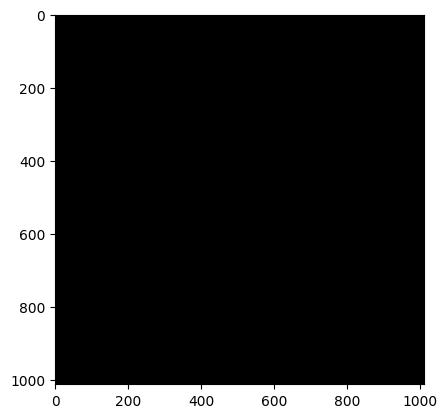

In [42]:
def isLocator(curr_integral, last_3_integrals):

  if len(last_3_integrals)<2:
    last_3_integrals.append(curr_integral)
    return False

  elif len(last_3_integrals)<3:
    last_3_integrals.append(curr_integral)

  else:
    last_3_integrals.pop(0)
    last_3_integrals.append(curr_integral)


  f,s,t = last_3_integrals[:3]
  if (abs(s-t) < 5) and (abs(f-3*s) < 6):
    return True
  else:
    return False





# Load the image
img = cv2.imread('./images/04-Black-mirror.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
_, thresh = cv2.threshold(img, 90, 255, cv2.THRESH_BINARY)

# Create a black mask image
integral = np.zeros_like(img)




# finding the image integral
h, w = thresh.shape[:2]
state = thresh[0][0]
count = 0
last_3_integrals = []
for i in range(h):

  for j in range(w):

    if thresh[i][j] == state:
      count += 1
    else:
      state = 0 if state == 255 else 255
      #integral[i][j] = count
      if isLocator(count, last_3_integrals):
        newJ = int(j-3.5*count)
        integral[i][newJ] += 127
      count = 0

for j in range(w):

  for i in range(h):

    if thresh[i][j] == state:
      count += 1
    else:
      state = 0 if state == 255 else 255
      #integral[i][j] = count
      if isLocator(count, last_3_integrals):
        newI = int(i-3.5*count)
        integral[newI][j] += 127
        if(integral[newI][j] > 200):
          print('hit')
      count = 0

plt.imshow(integral, cmap='gray')

In [ ]:
lines = cv2.HoughLinesP(integral, 1, np.pi / 180, threshold=35, minLineLength=50, maxLineGap=500)

# Create a black mask image
mask = np.zeros_like(gs_img)

# Draw detected lines on the mask
if lines is not None:
    for line in lines:
        x1, y1, x2, y2 = line[0]
        cv2.line(mask, (x1, y1), (x2, y2), (255, 255, 255), 2)
cv2_imshow(mask)

error: OpenCV(4.8.0) /io/opencv/modules/imgproc/src/hough.cpp:485: error: (-215:Assertion failed) image.type() == CV_8UC1 in function 'HoughLinesProbabilistic'


# Outline Detection 

In [ ]:
def qr_contour(hough_img, n_verticies=4):
    # find contours in the mask
    contours, _ = cv2.findContours(hough_img.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
    # Filter contours that have 4 edge points
    max_perimeter = 0
    selected_contour = None
    for contour in contours:
        approx = cv2.approxPolyDP(contour, 0.02 * cv2.arcLength(contour, True), True)
        if len(approx) == n_verticies:  
            perimeter = cv2.arcLength(contour, True)
            if perimeter > max_perimeter:
                max_perimeter = perimeter
                selected_contour = contour
    # # Draw the selected contour on the original image
    # if selected_contour is not None:
    #     cv2.drawContours(img, [selected_contour], -1, (0, 0, 0), 2)
    return selected_contour

    

def detect_outline(img):
    # Apply edge detection
    edges = cv2.Canny(thresh, 30, 150)
    # Apply Hough Line Transform to detect lines
    lines = cv2.HoughLinesP(edges, 1, np.pi / 180, threshold=30, minLineLength=50, maxLineGap=50)
    # Create a black mask image
    mask = np.zeros_like(edges)
    # Draw detected lines on the mask
    if lines is not None:
        for line in lines:
            x1, y1, x2, y2 = line[0]
            cv2.line(mask, (x1, y1), (x2, y2), (255, 255, 255), 2)
    # Find contour
    contour = qr_contour(img) 
    fited_img = fit_to_square(contour, )
    


def fit_to_square(contour, target_co):

# Testcase 1 (Normal)

In [944]:
def shift_perspective(img, contour, target_verticies):

    h,w = img.shape[:2]
    
    #   Original verticies from the contour
    bottom_left, top_left, top_right, bottom_right = contour.reshape(-1, 2)
    original_verticies = np.array([bottom_left, top_left, top_right, bottom_right], dtype= np.float32)
    
    # # Calculate the rest of the vertices
    # tl = [tr[0], bl[1]] #[bl[0], tr[1]]
    # br = [bl[0], tr[1]] #[tr[0], bl[1]] 

    # # Target verticies with preset value
    # target_verticies = np.array([bl, tl, tr, br], dtype= np.float32)

    # Apply prespective transfrom
    perspective_transform_matrix = cv2.getPerspectiveTransform(original_verticies, target_verticies)
    return (cv2.warpPerspective(img, perspective_transform_matrix, (img.shape[1], img.shape[0]), borderMode=cv2.BORDER_CONSTANT, borderValue=(255, 255, 255)))


In [725]:
img = cv2.imread('images/01-Getting-started.png', cv2.IMREAD_GRAYSCALE)

In [718]:
# convert into gray-scale -> threshold -> canny edge detection
_, thresh = cv2.threshold(img, 90, 255, cv2.THRESH_BINARY)
edges = cv2.Canny(thresh, 50, 150)

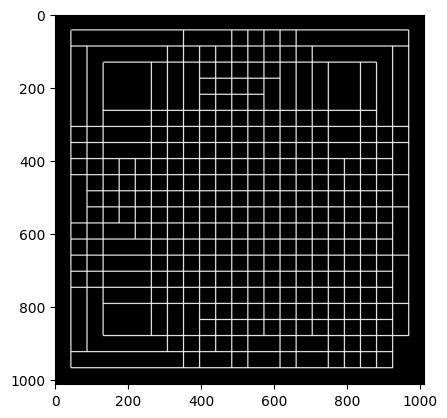

In [720]:
# Apply Hough Line Transform to detect lines
lines = cv2.HoughLinesP(edges, 1, np.pi / 180, threshold=35, minLineLength=50, maxLineGap=500)

# Create a black mask image
mask = np.zeros_like(thresh)

# Draw detected lines on the mask
if lines is not None:
    for line in lines:
        x1, y1, x2, y2 = line[0]
        cv2.line(mask, (x1, y1), (x2, y2), (255, 255, 255), 2)
plt.imshow(mask,cmap='gray')


(503, 503)


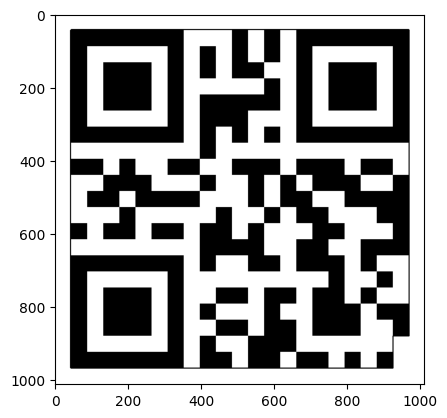

In [727]:
# Find contours in the mask
contours, _ = cv2.findContours(mask.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

# Filter contours that have 4 edge points
max_perimeter = 0
selected_contour = None
for contour in contours:
    approx = cv2.approxPolyDP(contour, 0.02 * cv2.arcLength(contour, True), True)
    if len(approx) == 4:  # Filter hexagons
        #print(len(approx))
        perimeter = cv2.arcLength(contour, True)
        if perimeter > max_perimeter:
            max_perimeter = perimeter
            selected_contour = contour

# Draw the selected contour on the original image
img_cpy = img.copy()
if selected_contour is not None:
    cv2.drawContours(img_cpy, [selected_contour], -1, (0, 0, 0), 2)

# Find the base centroid
def find_centroid(contour):
    M = cv2.moments(contour)
    cx = int(M['m10']/M['m00'])
    cy = int(M['m01']/M['m00'])
    return cx,cy

base_centroid = find_centroid(selected_contour)

# print(base_centroid)

plt.imshow(img_cpy, cmap='gray')

# Testcase 2 (Shifted)

In [916]:
img = cv2.imread('./images/02-Matsawar-3edel-ya3am.png', cv2.IMREAD_GRAYSCALE)


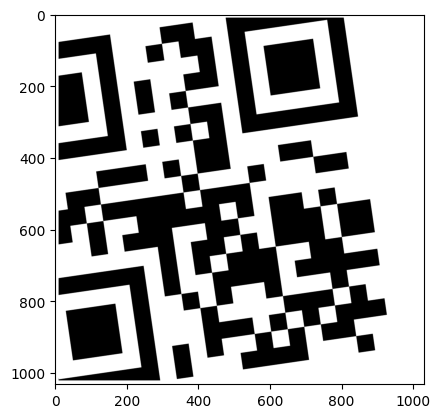

In [917]:
# Add padding so we can draw complete lines in the hough transform
padding = 10
padded_img = cv2.copyMakeBorder(img, padding, padding, padding, padding, cv2.BORDER_CONSTANT, value=(255,255,255))
# _, padded_thresh = cv2.threshold(padded_img, 90, 255, cv2.THRESH_BINARY)

plt.imshow(padded_img, cmap='gray')

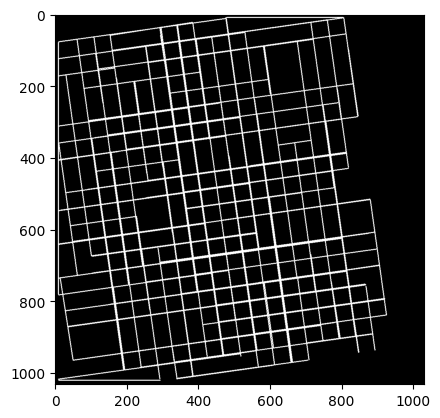

In [918]:
def get_hough(img):
    # Find the Hough transfrom of the image #
    
    # Apply Canny edge detection 
    edges = cv2.Canny(img, 50, 150)
    # Apply Hough transfrom
    lines = cv2.HoughLinesP(edges, 1, np.pi / 180, threshold=30, minLineLength=50, maxLineGap=190)
    # Draw Hough lines on a black mask and return it
    mask = np.zeros_like(img)
    if lines is not None:
        for line in lines:
            x1, y1, x2, y2 = line[0]
            cv2.line(mask, (x1, y1), (x2, y2), (255, 255, 255), 2)
    return mask

hough_lines_2 = get_hough(padded_img)

plt.imshow(hough_lines_2, cmap='gray')

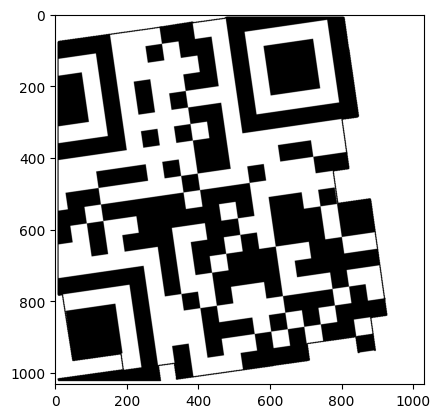

In [919]:
def get_contour(houghImg):
    # Find the exact and approximate contour of the qr code #

    # find contours in the hough image
    contours, _ = cv2.findContours(houghImg, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

    # Filter contours that have 4 edge points and max area
    max_area = 0
    selected_contour_exact = None
    selected_contour_appx = None

    for contour in contours:
        epsilon = 0.1 * cv2.arcLength(contour, True)
        approx = cv2.approxPolyDP(contour, epsilon, True)
        if len(approx) == 4:  
            # Calculate the area of the contour
            area = cv2.contourArea(contour)
            if area > max_area:
                max_area = area
                selected_contour_exact = contour
                selected_contour_appx = approx
    return (selected_contour_exact, selected_contour_appx)
    

exact,appx = get_contour(hough_lines_2)
# Draw the selected contour on a copy of the original image
img_cpy = padded_img.copy()
if exact is not None:
    cv2.drawContours(img_cpy, [exact], -1, (0, 0, 0), 2)
plt.imshow(img_cpy, cmap='gray')

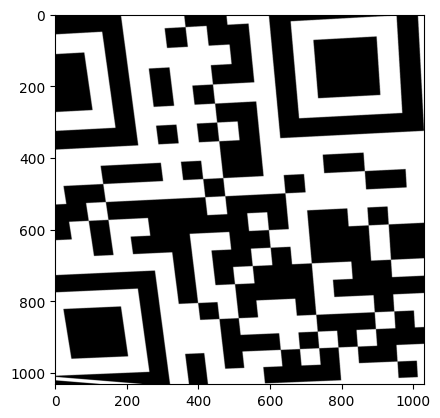

In [915]:
# Trying perspective transfrom #
#   Original verticies from the contour
bottom_left, top_left, top_right, bottom_right = selected_appx_contour.reshape(-1, 2)
original_verticies = np.array([bottom_left, top_left, top_right, bottom_right], dtype= np.float32)

# Target verticies with preset value
target_verticies = np.array([[1012,0], [0,0], [0,1012], [1012,1012]], dtype= np.float32)

# Apply prespective transfrom
perspective_transform_matrix = cv2.getPerspectiveTransform(original_verticies, target_verticies)
warped_image = cv2.warpPerspective(padded_img, perspective_transform_matrix, (padded_img.shape[1], padded_img.shape[0]), )

plt.imshow(warped_image, cmap='gray')

In [654]:
# Function to rotate a contour
def cart2pol(x, y):
    theta = np.arctan2(y, x)
    rho = np.hypot(x, y)
    return theta, rho


def pol2cart(theta, rho):
    x = rho * np.cos(theta)
    y = rho * np.sin(theta)
    return x, y


def rotate_contour(cnt, angle):
    M = cv2.moments(cnt)
    cx = int(M['m10']/M['m00'])
    cy = int(M['m01']/M['m00'])

    cnt_norm = cnt - [cx, cy]
    
    coordinates = cnt_norm[:, 0, :]
    xs, ys = coordinates[:, 0], coordinates[:, 1]
    thetas, rhos = cart2pol(xs, ys)
    
    thetas = np.rad2deg(thetas)
    thetas = (thetas + angle) % 360
    thetas = np.deg2rad(thetas)
    
    xs, ys = pol2cart(thetas, rhos)
    
    cnt_norm[:, 0, 0] = xs
    cnt_norm[:, 0, 1] = ys

    cnt_rotated = cnt_norm + [cx, cy]
    cnt_rotated = cnt_rotated.astype(np.int32)

    return cnt_rotated

In [855]:
# Finding the angle of rotation of the contour#

def find_point_with_yMax (cont):
    # Finding the bottom right point #
    max_y = 0
    max_point = None
    for point in cont:
        if point[0] > max_y:
            max_y = point[0]
            max_point = point
    return max_point

def find_point_with_xMminYMax (cont):
    # Finding the top right point #
    min_x = 9999
    min_points = []
    for point in cont:
        if point[1] <= min_x:
            min_x = point[1]
            min_points.append(point) 
    return find_point_with_yMax(min_points)

p1 = find_point_with_xMminYMax(selected_contour.reshape(-1, 2))
p2 = find_point_with_yMax(selected_contour.reshape(-1, 2))
vector = p2-p1


def find_angle(vec):
    #Find angle between the vector and the y-axis#
    y_axis = np.array([0, 1])

    # Calculate the dot product
    dot_product = np.dot(vec, y_axis)

    # Calculate the magnitudes of the vectors
    magnitude1 = np.linalg.norm(vec)
    magnitude2 = np.linalg.norm(y_axis)

    # Calculate the cosine of the angle between the 2 lines
    cosine_angle = dot_product / (magnitude1 * magnitude2)

    # Calculate the angle in degrees
    return (np.arccos(cosine_angle) * 180 / np.pi)

angle = find_angle(vector)
print("Angle between the lines:", angle, "degrees")

Angle between the lines: 8.381822645285823 degrees


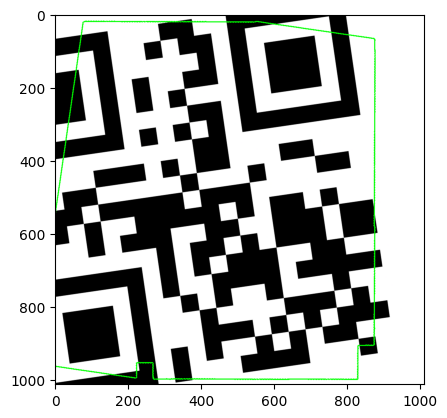

In [762]:
# Trying to rotate the contour
rotated_cont_img = img.copy()
rotated_cont = rotate_contour(selected_contour, angle)
cv2.drawContours(rotated_cont_img, [rotated_cont], -1, (0, 255, 0), 2)
plt.imshow(rotated_cont_img, cmap='gray')

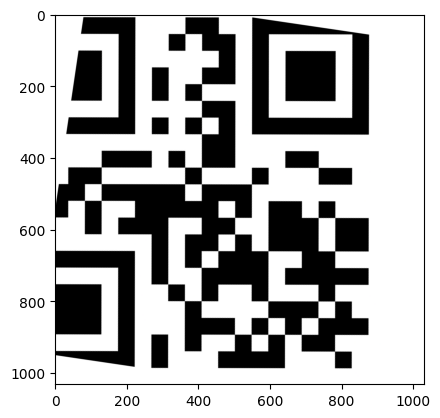

In [856]:
# Trying to rotate the image #

def rotate_img_clockwise(img, angle):
    h,w = img.shape[:2]
    # Calculate the rotation matrix
    rotation_matrix = cv2.getRotationMatrix2D((w / 2, h / 2), -angle, 1)
    # Perform the rotation
    return (cv2.warpAffine(img, rotation_matrix, (w, h), borderMode=cv2.BORDER_CONSTANT, borderValue=(255, 255, 255)))

rotated_img = rotate_img_clockwise(padded_img.copy(), angle)
plt.imshow(rotated_img, cmap='gray')

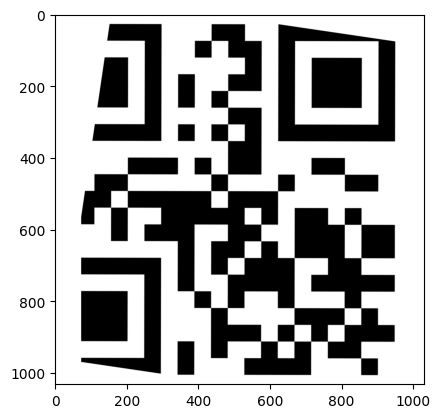

In [857]:
# Trying to translate the image #
def translate_to_middle(img, contour, tolerance_x=0, tolerance_y=0):
    # Translate the image to the middle of the frame #

    # Centroid of base image is right at the middle, Whiler Centroid of the #
    # current image is not, thus tolerance is added to correct this difference # 

    h,w = img.shape[:2]
    # Find img centroid
    old_centroid = find_centroid(contour=contour)
    # Find the translation matrix to the base centroid
    tx = base_centroid[0] - old_centroid[0] + tolerance_x
    ty = base_centroid[1] - old_centroid[1] + tolerance_y
    translation_matrix = np.float32([[1, 0, tx], [0, 1, ty]])
    # Translate the image
    return (cv2.warpAffine(img, translation_matrix, (w, h), borderMode=cv2.BORDER_CONSTANT, borderValue=(255, 255, 255)))

translated_img = translate_to_middle(rotated_img, selected_contour, tolerance_y= 30)
plt.imshow(translated_img, cmap='gray')

# Testcase 3 (Upside-down)

In [ ]:
img = cv2.imread('/content/03-Leffy-bina-ya-donya.png')

In [ ]:
# convert into gray-scale -> threshold -> canny edge detection
gs_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
_, thresh = cv2.threshold(gs_img, 90, 255, cv2.THRESH_BINARY)
edges = cv2.Canny(thresh, 50, 150)

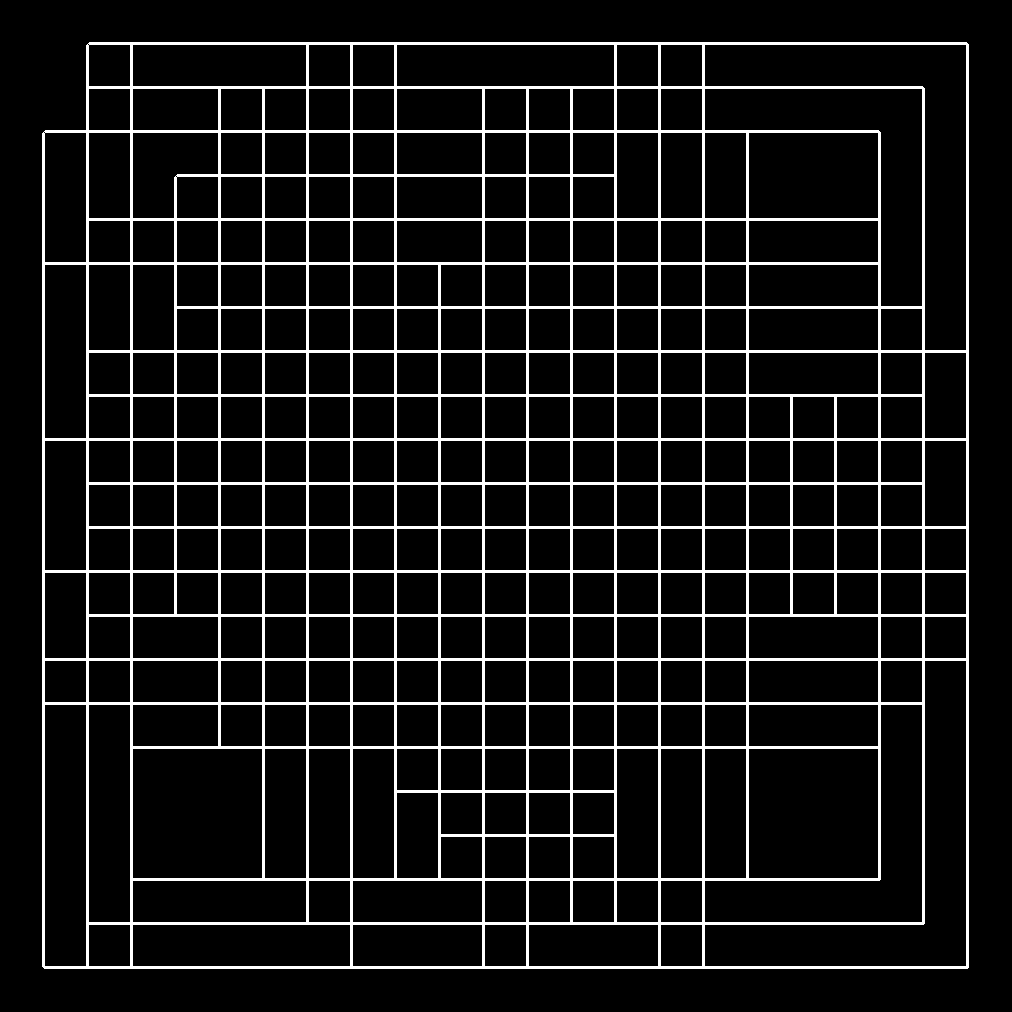

In [ ]:
# Apply Hough Line Transform to detect lines
lines = cv2.HoughLinesP(edges, 1, np.pi / 180, threshold=35, minLineLength=50, maxLineGap=500)

# Create a black mask image
mask = np.zeros_like(gs_img)

# Draw detected lines on the mask
if lines is not None:
    for line in lines:
        x1, y1, x2, y2 = line[0]
        cv2.line(mask, (x1, y1), (x2, y2), (255, 255, 255), 2)
cv2_imshow(mask)
# Find contours in the mask image
# contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# # Fill the area enclosed by the lines with black color
# filled_image = np.zeros_like(img)

# cv2.fillPoly(mask, mask[0], (255, 255, 255))

# cv2_imshow(filled_image)

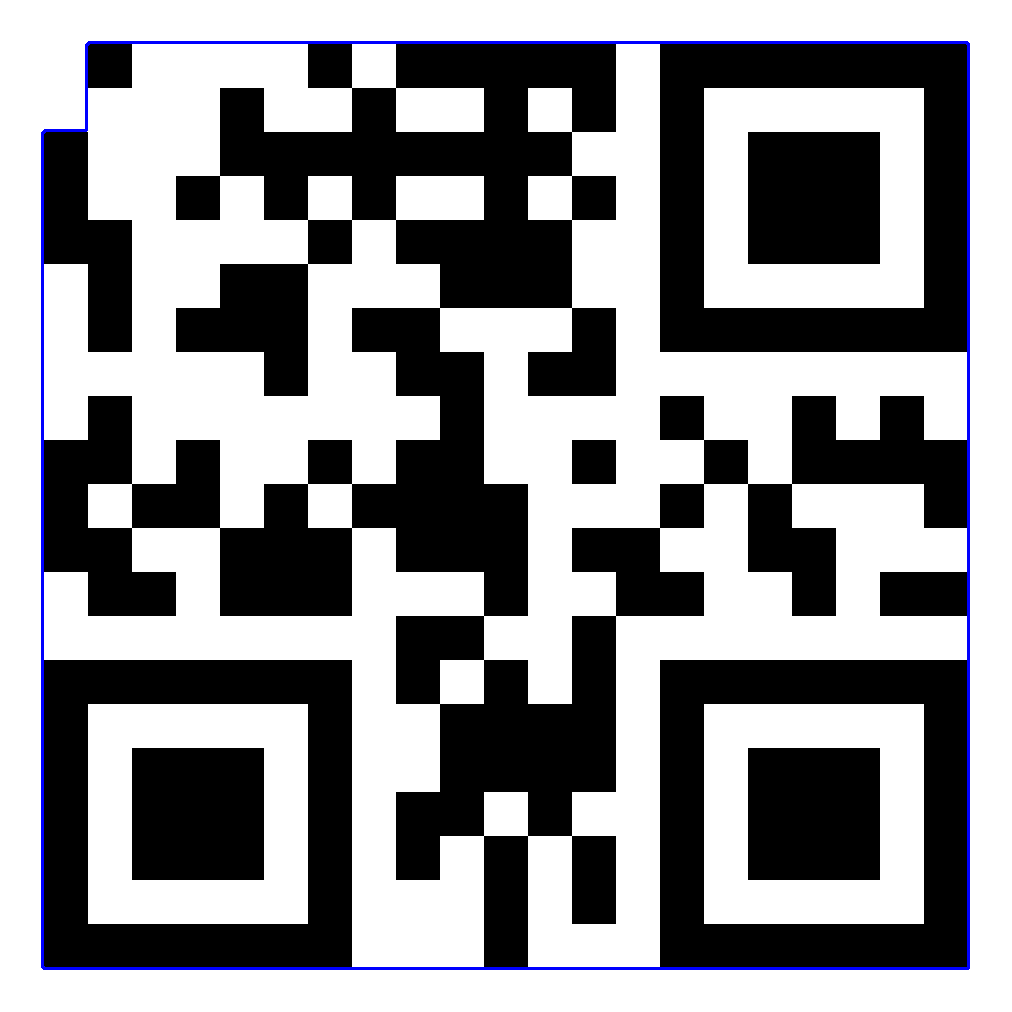

In [ ]:
# find contours in the mask

contours, _ = cv2.findContours(mask.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
# Filter contours that have 4 edge points
max_perimeter = 0
selected_contour = None
for contour in contours:
    approx = cv2.approxPolyDP(contour, 0.02 * cv2.arcLength(contour, True), True)
    if len(approx) == 4:  # Filter hexagons
        #print(len(approx))
        perimeter = cv2.arcLength(contour, True)
        if perimeter > max_perimeter:
            max_perimeter = perimeter
            selected_contour = contour

# Draw the selected contour on the original image
if selected_contour is not None:
    cv2.drawContours(img, [selected_contour], -1, (255, 0, 0), 2)

cv2_imshow(img)

# Testcase 4 (Inverted)

# Testcase 5 (Caesear cipher)

Apply a correction algorithm 

[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]


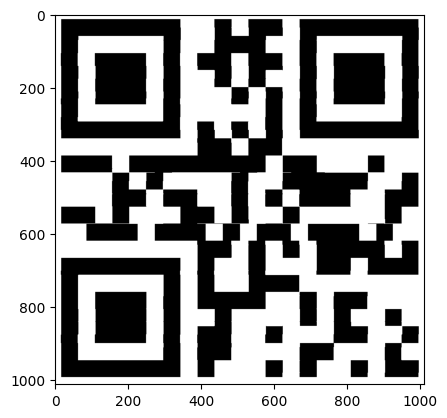

In [11]:
#define tolerance
t = 30

# load a grayscale image
img = cv2.imread('./images/05-Caesar-cipher.png', cv2.IMREAD_GRAYSCALE)
_, img = cv2.threshold(img, 90, 255, cv2.THRESH_BINARY)
mask = np.full((img.shape[0], img.shape[1]), 255)
h, w = img.shape[:2]

first_from_left = 0
first_from_right = 0
# find first black pixel from the left
b = False
for i in range(h):
  if b :
    break
  for j in range(w):
    if img[i, j] == 0:
      first_from_left = j
      b = True
      break
  

# find first black pixel from the right 
b = False
for i in range(h):
  if b :
    break
  for j in range(w-1, 0, -1):
    if img[i, j] == 0:
      first_from_right = j
      b = True
      break
  

# calculate the left and right refrences
qr_width = first_from_right-first_from_left
left_ref = int((w-qr_width)/2)
right_ref = left_ref+qr_width

#print(f"sss: {first_from_left} {first_from_right}")

# apply correction to each row
for i in range(h):

  found_black_pixel = False

  # find left and right boundaries
  l_ptr = 0
  r_ptr = w-1

  while (img[i, l_ptr] == 255 or img[i, r_ptr] == 255) and (l_ptr < r_ptr):
    if img[i, l_ptr] == 255:
      l_ptr += 1
    else:
      found_black_pixel = True

    if img[i, r_ptr] == 255:
      r_ptr -= 1
    else:
      found_black_pixel = True

  #print(l_ptr)


  # correct if cross left refrence

  if (l_ptr<left_ref ) and found_black_pixel:
    shift_amount = left_ref - l_ptr
    # Shift row to the right -->
    mask[i][l_ptr+shift_amount:r_ptr+shift_amount] = img[i][l_ptr:r_ptr]

  elif (right_ref-r_ptr < t) and found_black_pixel:
    shift_amount = right_ref-r_ptr
    # Shift row to the right -->
    mask[i][l_ptr+shift_amount:r_ptr+shift_amount] = img[i][l_ptr:r_ptr]

  elif (r_ptr>right_ref ) and found_black_pixel:
    shift_amount = r_ptr - right_ref
    # Shift row to the left <--
    mask[i][l_ptr-shift_amount:r_ptr-shift_amount] = img[i][l_ptr:r_ptr]

  elif (l_ptr-left_ref < t ) and found_black_pixel:
    shift_amount = l_ptr-left_ref
    # Shift row to the left <--
    mask[i][l_ptr-shift_amount:r_ptr-shift_amount] = img[i][l_ptr:r_ptr]
  
  else:
    # Center the row
    center_of_the_row = int((r_ptr + l_ptr)/2)
    center_refrence = int((right_ref + left_ref)/2) 
    shift_amount = center_of_the_row - center_refrence
    mask[i][l_ptr-shift_amount:r_ptr-shift_amount] = img[i][l_ptr:r_ptr]


#plt.imshow(img, cmap='gray')
print(mask)
plt.imshow(mask, cmap='gray')


# Testcase 6 (Rohmbus, Railfence cipher)

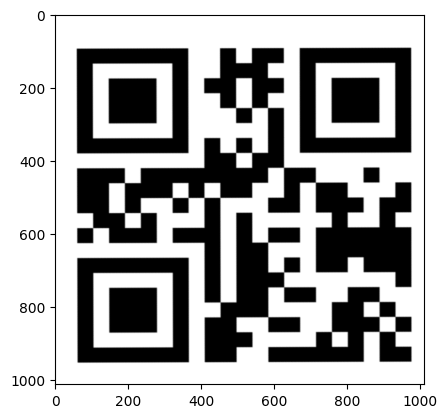

In [945]:
img = cv2.imread('./images/06-Railfence-cipher.png', cv2.IMREAD_GRAYSCALE)

hough_lines_6 = get_hough(img)

# Find contours
exact,appx = get_contour(hough_lines_6)
# cv2.drawContours(appx, [selected_contour], -1, (255, 255, 255), 2)

bottom_left, top_left, top_right, bottom_right = appx.reshape(-1, 2)
# Calculate new edge vertices positions
top_left = [top_right[0], bottom_left[1]]
bottom_right = [bottom_left[0], top_right[1]]
target_verticies = np.array([bottom_left, top_left, top_right, bottom_right], dtype= np.float32)
warped_image = shift_perspective(img, appx, target_verticies)
# # Get the edge vertices of the contour

# original_verticies = np.array([bottom_left, top_left, top_right, bottom_right], dtype= np.float32)
# print(original_verticies)


# # print(target_verticies)

# # Apply prespective 
# perspective_transform_matrix = cv2.getPerspectiveTransform(original_verticies, target_verticies)
# warped_image = cv2.warpPerspective(img, perspective_transform_matrix, (img.shape[1], img.shape[0]), borderMode=cv2.BORDER_CONSTANT, borderValue=(255, 255, 255))

plt.imshow(warped_image, cmap='gray')


# Testcase 7 (Finger)

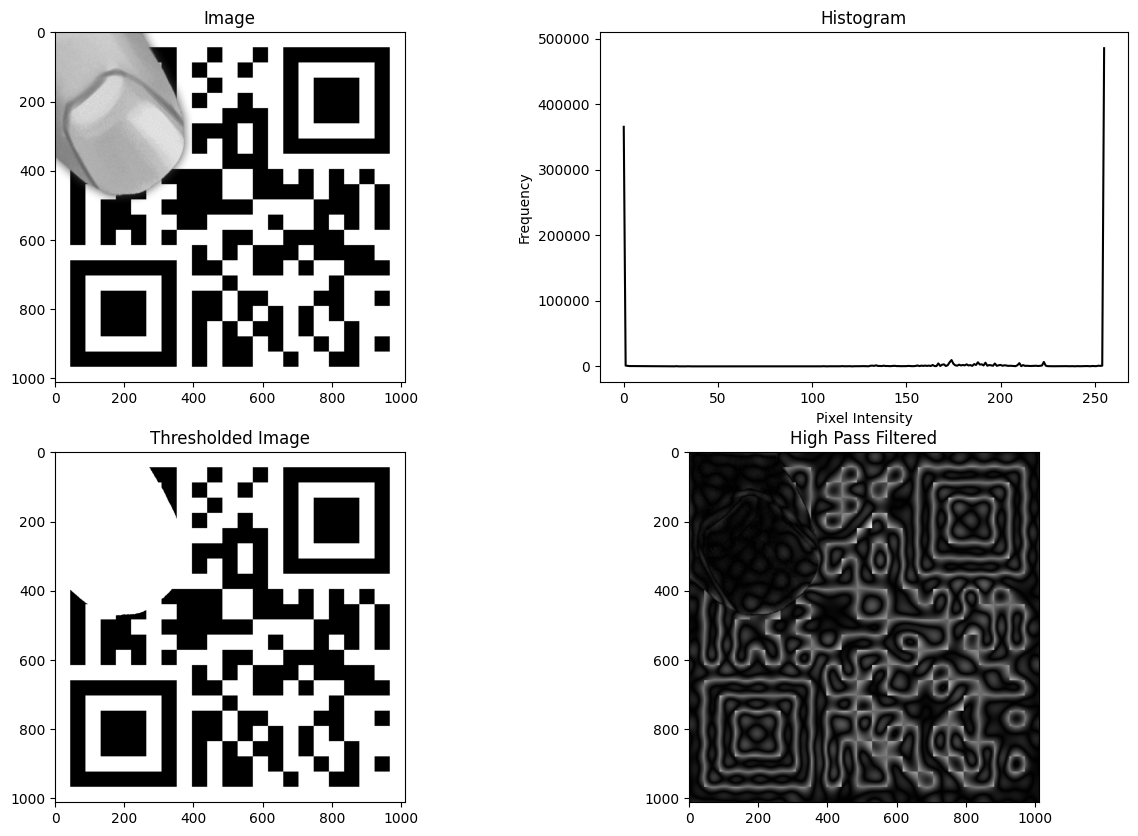

In [676]:
# Load the image
image = cv2.imread('images/07-THE-MIGHTY-FINGER.png', cv2.IMREAD_GRAYSCALE)

# Calculate the histogram
hist = cv2.calcHist([image], [0], None, [256], [0,256])

_, thresh_img = cv2.threshold(image, 90, 255, cv2.THRESH_BINARY)

# Calculate the Fourier transform
f_transform = np.fft.fft2(image)
f_transform_shifted = np.fft.fftshift(f_transform)
magnitude_spectrum = 20*np.log(np.abs(f_transform_shifted)+500)

# Apply high-pass filter
rows, cols = image.shape
crow, ccol = rows//2, cols//2
mask = np.ones((rows, cols), np.uint8)
r = 15  # Radius of the circular mask
center = [crow, ccol]
x, y = np.ogrid[:rows, :cols]
mask_area = (x - center[0])**2 + (y - center[1])**2 <= r*r
mask[mask_area] = 0
f_transform_shifted_filtered = f_transform_shifted * mask

# Calculate the inverse Fourier transform
f_transform_filtered = np.fft.ifftshift(f_transform_shifted_filtered)
image_filtered = np.fft.ifft2(f_transform_filtered)
image_filtered = np.abs(image_filtered)

# Display the image, its histogram, and its Fourier transform
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Image')

plt.subplot(2, 2, 2)
plt.plot(hist, color='black')
plt.title('Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')

plt.subplot(2, 2, 3)
plt.imshow(thresh_img, cmap='gray')
plt.title('Thresholded Image')

plt.subplot(2, 2, 4)
plt.imshow(image_filtered, cmap='gray')
plt.title('High Pass Filtered')

plt.show()

# Testcase 8 (Bahtana)

In [ ]:
img = cv2.imread('./images/08-Compresso-Espresso.png', cv2.IMREAD_GRAYSCALE)

# Calculate the histogram
hist = cv2.calcHist([img], [0], None, [256], [0,256])

# Plot the histogram
plt.plot(hist, color='gray')

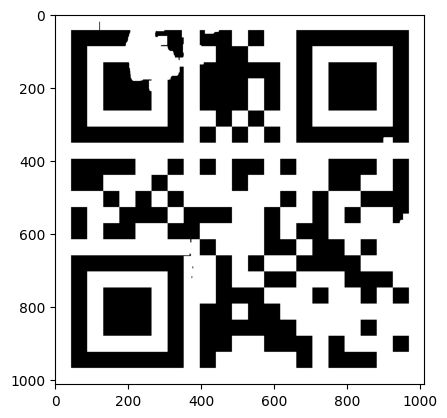

In [503]:
# Find the unique pixel values
unique_values = np.unique(img)
#print(unique_values) # 164, 222

# Apply thresholding
ret, thresh = cv2.threshold(img, 170, 255, cv2.THRESH_BINARY)

# Define the kernel for morphological operation
kernel = np.ones((21,21),np.uint8)

# Apply morphological closing , !!!!!!!!!!!!!!apply openning
closing = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel)

plt.imshow(closing, cmap='gray')

# Testcase 9 (Ink smudge)

In [ ]:
img = cv2.imread('./images/09-My-phone-fell-while-taking-this-one-...-or-did-it.png', cv2.IMREAD_GRAYSCALE)

# Calculate the histogram
hist = cv2.calcHist([img], [0], None, [256], [0,256])

# Plot the histogram
#plt.plot(hist, color='gray')

In [ ]:
# Apply morphological opening (will be closing in this case) 

# Create a kernel
kernel = np.ones((17, 17), np.uint8)

# Apply morphological opening
processed_img = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)

#plt.imshow(processed_img, cmap='gray')

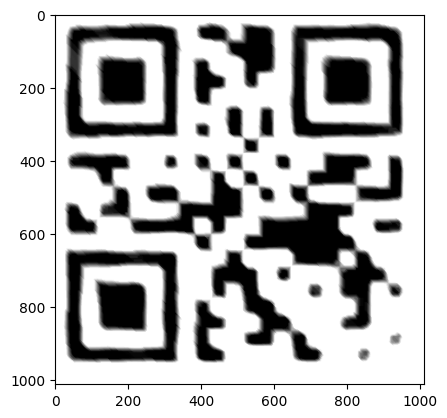

In [539]:
# Apply Weiner deconvultion

# Intialize the kernel 
kernel_size = 3
kernel = np.zeros((kernel_size, kernel_size))
for i in range(kernel_size):
    kernel[i, i] = 1/(kernel_size**2)
# kernel /= np.sum(kernel)

# Pad the kernel to match the size of the blurred image
padded_kernel = np.zeros_like(processed_img, dtype=np.float64)
kernel_height, kernel_width = kernel.shape
padded_kernel[:kernel_height, :kernel_width] = kernel

# FT of the kernel
ft_kernel = np.fft.fft2(padded_kernel)

# FT of the image
ft_image = np.fft.fft2(processed_img)

# Apply Wiener deconvolution
epsilon = 1e-8  # Small constant to avoid division by zero
wiener_filter = np.conj(ft_kernel) / (np.abs(ft_kernel)**2 + epsilon)
restored_image_fft = ft_image * wiener_filter
restored_image = np.fft.ifft2(restored_image_fft).real

# Clip the values to [0, 255] and convert to uint8
restored_image = np.clip(restored_image, 0, 255).astype(np.uint8)

# # Apply thresholding
# ret, thresholded_spectrum = cv2.threshold(restored_image, 250, 255, cv2.THRESH_BINARY)

# Apply median blurring
blurred_image = cv2.medianBlur(restored_image, 5)

kernel = np.ones((21,21),np.uint8)
closing = cv2.morphologyEx(blurred_image, cv2.MORPH_OPEN, kernel)

plt.imshow(closing, cmap='gray')

In [ ]:
# Different attmepts at solving this one

##################################################################################
# Trying the effect of a diagonal averaging kernel 
kernel_size = 21
kernel = np.zeros((kernel_size, kernel_size))
for i in range(kernel_size):
    kernel[i, i] = 1/kernel_size**2
i = cv2.imread('./images/01-Getting-started.png', cv2.IMREAD_GRAYSCALE)
res = cv2.filter2D(i, -1, kernel) # Has a similar effect to testcase 9
#plt.imshow(res, cmap='gray')

# Getting the ft
ft_image = np.fft.fft2(res)
ft_shift_img = np.fft.fftshift(ft_image)
magnitude_spectrum_img = np.log(np.abs(ft_shift_img + 500 )) # Has a similar ft to testcase 9
plt.imshow(magnitude_spectrum_img, cmap='gray')
##################################################################################
# Trying weiner using my own blurred image to see if it works

# Load the blurred image and the kernel
blurred_image = res
kernel = kernel
#kernel = np.zeros((17, 17), dtype=np.float64) / 17**2  # Define the kernel (assuming it's an averaging filter)

# Pad the kernel to match the size of the blurred image
padded_kernel = np.zeros_like(blurred_image, dtype=np.float64)
kernel_height, kernel_width = kernel.shape
padded_kernel[:kernel_height, :kernel_width] = kernel

# Compute the Fourier Transforms of the blurred image and the padded kernel
blurred_image_fft = np.fft.fft2(blurred_image)
padded_kernel_fft = np.fft.fft2(padded_kernel)

# Apply Wiener deconvolution
epsilon = 1e-8  # Small constant to avoid division by zero
wiener_filter = np.conj(padded_kernel_fft) / (np.abs(padded_kernel_fft)**2 + epsilon)
restored_image_fft = blurred_image_fft * wiener_filter
restored_image = np.fft.ifft2(restored_image_fft).real

# Clip the values to [0, 255] and convert to uint8
restored_image = np.clip(restored_image, 0, 255).astype(np.uint8)
plt.imshow(restored_image, cmap='gray')
##################################################################################
# Trying weiner from scikit-image library
from skimage import restoration

# Intialize the kernel 
kernel_size = 19
kernel = np.zeros((kernel_size, kernel_size))
for i in range(kernel_size):
    kernel[i, i] = 1/(kernel_size**2)

deconvolved, _ = restoration.unsupervised_wiener(img, kernel)
plt.imshow(deconvolved, cmap='gray')
##################################################################################
# Compute fourier tranform of the image 
f_transform = np.fft.fft2(img)
f_transform_shifted = np.fft.fftshift(f_transform)
magnitude_spectrum = np.log(np.abs(f_transform_shifted + 500))

# From the fourier transform we can see that the point spread 

# Create a circular low-pass filter
kernel_size = 1012
r = 1
kernel = np.ones((kernel_size, kernel_size), np.uint8)
cv2.circle(kernel, (kernel_size//2, kernel_size//2), r, 0, -1)


# Multiply the kernel by the FT of the image
filtered_transform = f_transform_shifted * kernel
magnitude_spectrum_filtered = np.log(np.abs(filtered_transform + 1))

# Do inverse fourier transform
fft_ifft_shift = np.fft.ifftshift(filtered_transform)
imageThen = np.fft.ifft2(fft_ifft_shift)
imageThen = np.abs(imageThen)
#plt.imshow(imageThen, cmap='gray')

# Apply thresholding
# ret, thresholded_spectrum = cv2.threshold(imageThen, 100, 255, cv2.THRESH_BINARY)
plt.imshow(imageThen, cmap='gray')
##################################################################################
# Define the size of the shift
shift_size = 3

# Create the opposite shift filter
kernel = np.eye(shift_size, dtype=np.float32)  # Identity matrix
kernel = np.flip(kernel, axis=0)
kernel /= shift_size

filter = np.array([
    [0,0,1],
    [0,0,0],
    [1,0,0]
], np.float32)
filter /= 2
# Apply the opposite shift filter
restored_image = cv2.filter2D(img, -1, filter)

ret, thresholded_spectrum = cv2.threshold(img, 120, 255, cv2.THRESH_BINARY)


plt.imshow(thresholded_spectrum, cmap='gray')

# Testcase 10 (Grey photo)

# Testcase 11 (Vertical bar)

In [148]:
image = cv2.imread('./images/11-weewooweewooweewoo.png', cv2.IMREAD_GRAYSCALE)

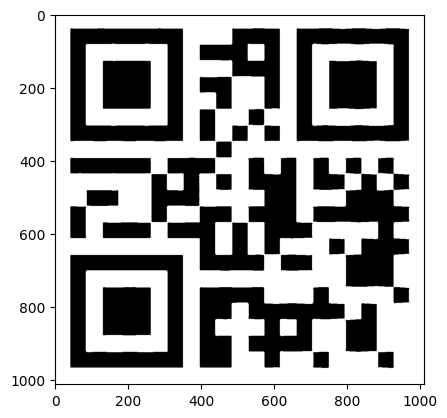

In [458]:
# Compute fourier tranform of the image 
f_transform = np.fft.fft2(image)
f_transform_shifted = np.fft.fftshift(f_transform)

# # View transform and zoom on the middle
# magnitude_spectrum =  np.log(np.abs(f_transform_shifted) + 100)
# plt.imshow(magnitude_spectrum, cmap='gray')

# Create a filter to remove sinusoidal noise of frequency 11
mask = np.ones_like(image)
rows, cols = image.shape
crow, ccol = rows // 2, cols // 2
mask[crow][ccol-11] = 0
mask[crow][ccol+11] = 0
# mask[crow][ccol-12] = 0
# mask[crow][ccol+12] = 0


# Apply the filter mask
f_transform_shifted_filtered = f_transform_shifted * mask

# # View transform and zoom on the middle
# magnitude_spectrum_filtered =  np.log(np.abs(f_transform_shifted_filtered) + 100)
# plt.imshow(magnitude_spectrum_filtered, cmap='gray')

# Do inverse fourier transform
fft_ifft_shift = np.fft.ifftshift(f_transform_shifted_filtered)
imageThen = np.fft.ifft2(fft_ifft_shift)
imageThen = np.abs(imageThen)
#plt.imshow(imageThen, cmap='gray')

# Apply thresholding
ret, thresholded_spectrum = cv2.threshold(imageThen, 100, 255, cv2.THRESH_BINARY)
plt.imshow(thresholded_spectrum, cmap='gray')

# Testcase 12 (Noisy)

# Testcase 13 (Black photo)

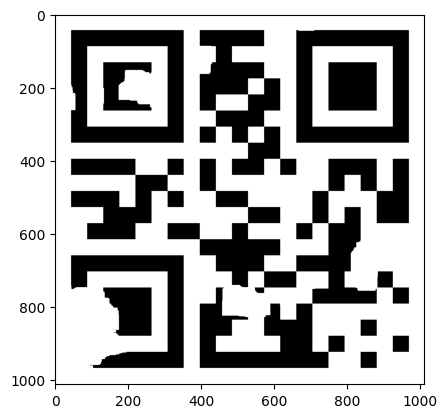

In [548]:
img = cv2.imread('./images/13-2el-noor-2ata3.png', cv2.IMREAD_GRAYSCALE)

# Calculate the histogram
hist = cv2.calcHist([img], [0], None, [256], [0, 256])

# Plot the histogram
#plt.plot(hist, color='gray')

# Apply histogram equalization
equlaized_image = cv2.equalizeHist(img)

# Calculate the new histogram
hist = cv2.calcHist([equlaized_image], [0], None, [256], [0, 256])

# Find the unique pixel values
unique_values = np.unique(equlaized_image)

# Print the unique pixel values
#print("Unique pixel values:", unique_values) #0 217 238 255

# Modify those values
# 217->255 , 238->255
#equlaized_image[equlaized_image == 255] = 0
equlaized_image[equlaized_image == 217] = 255
equlaized_image[equlaized_image == 238] = 255

# Apply opening (equivelant to closing) 
kernel = np.ones((41,41),np.uint8)
closing = cv2.morphologyEx(equlaized_image, cv2.MORPH_OPEN, kernel)

plt.imshow(closing, cmap='gray')



# Testcase 14 (Banana)

In [946]:
img = cv2.imread('./images/14-BANANAAA!!!.png', cv2.IMREAD_GRAYSCALE)

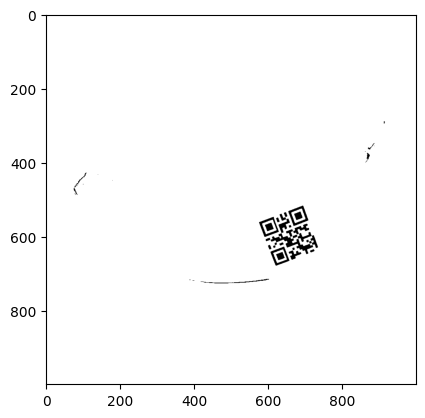

In [947]:
# convert into gray-scale -> threshold
_, thresh_img = cv2.threshold(img, 90, 255, cv2.THRESH_BINARY)

plt.imshow(thresh_img, cmap='gray')

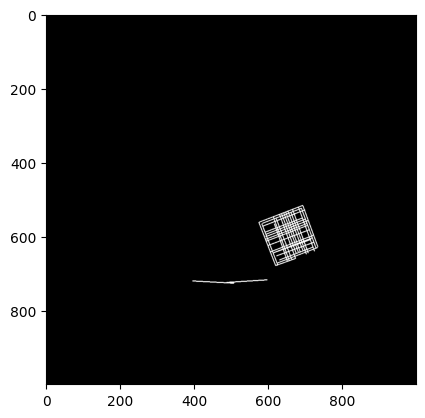

In [948]:

hough_lines_14 = get_hough(thresh_img)
plt.imshow(hough_lines_14, cmap='gray')

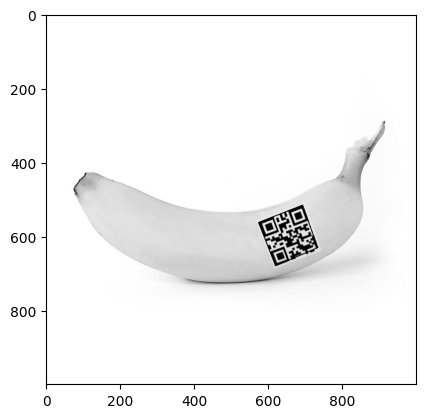

In [949]:
# find contours in the mask
exact,appx = get_contour(hough_lines_14)

# Draw the selected contour on the original image
contour_img = img.copy()
if appx is not None:
    cv2.drawContours(contour_img, [appx], -1, (0, 0, 0), 2)


plt.imshow(contour_img, cmap='gray')

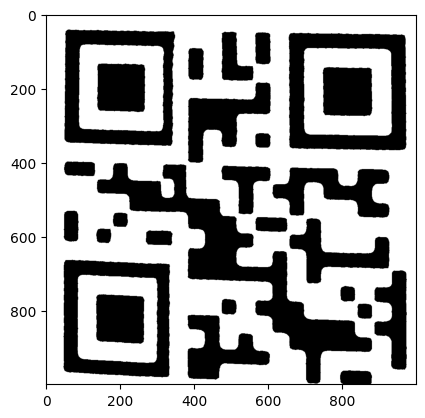

In [951]:
# Target verticies 
target_verticies = np.array([[967,42], [42,42], [42,967], [967,967]], dtype= np.float32)
warped_image = shift_perspective(img, appx, target_verticies)
# Apply thresholding
_, thresh_img = cv2.threshold(warped_image, 60, 255, cv2.THRESH_BINARY)



plt.imshow(thresh_img, cmap='gray')

# Testcase 15 (Wara2a ma2to3a)


# Testcase 16 (Big QR)

# Noise detection

In [ ]:
def detect_noise_type(image_gray, threshold=0.05):
    # Calculate the standard deviation of pixel intensities
    std_dev = np.std(image_gray)

    # Check for Gaussian noise based on standard deviation
    if std_dev < threshold * 255:
        return "Gaussian Noise"

    # Calculate the histogram of pixel intensities
    histogram = cv2.calcHist([image_gray], [0], None, [256], [0, 256])

    # Check for salt and pepper noise based on histogram spikes
    peak_ratio = np.sum(histogram[:10]) + np.sum(histogram[-10:])
    total_pixels = image_gray.shape[0] * image_gray.shape[1]
    if peak_ratio / total_pixels > 0.01:
        return "Salt and Pepper Noise"

    # Check for speckle noise based on local variance
    variance = cv2.Laplacian(image_gray, cv2.CV_64F).var()
    if variance < threshold:
        return "Speckle Noise"

    return "No Recognizable Noise"


# Example usage:
image_path = 'images/01-Getting-started.png'
image = cv2.imread(image_path)
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

noise_type = detect_noise_type(gray_image)
print("Detected Noise Type:", noise_type)
